In [1]:
from IPython.display import HTML
from __future__ import print_function
import numpy as np
from bqplot import *
from ipywidgets import widgets, interact, Label
from traitlets import link
from traitlets import HasTraits, Float
import matplotlib.pyplot as plt
from scipy.linalg import eigvalsh
from IPython.display import display
from matplotlib import rcParams
 
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')



# **Mohr's Circle**

## Plane Stress

Our basic equations for Mohr's Circle in 2D are:

$\sigma_{11} = \frac{\left(\sigma_{xx} + \sigma_{yy}\right)}{2} + \frac{\left(\sigma_{xx} - \sigma_{yy}\right)}{2}\cos{\left(2\theta\right)} + \sigma_{xy}\sin{\left(2\theta\right)}$

$\sigma_{22} = \frac{\left(\sigma_{xx} + \sigma_{yy}\right)}{2} - \frac{\left(\sigma_{xx} - \sigma_{yy}\right)}{2}\cos{\left(2\theta\right)} - \sigma_{xy}\sin{\left(2\theta\right)}$

$\sigma_{12} = -\frac{\left(\sigma_{xx} - \sigma_{yy}\right)}{2}\sin{\left(2\theta\right)} - \sigma_{xy}\cos{\left(2\theta\right)} $

Where we are transforming our stresses from an {$x$,$y$,$z$} coordinate system to a {1,2,3} coordinate system that are $\theta$ degrees apart.  When rotating from the original ({$x$,$y$,$z$}) to the final ({1,2,3}) coordinate system, a positive $\theta$ means a counter-clockwise rotation.

We can also represent these equations as Mohr's circle.  The centre of our circle is always the average value of the normal stresses, regardless of the coordinate system being considered:

Centre = $\left[\left(\sigma_{xx}+\sigma_{yy}\right)/2,0\right]$ = $\left[\left(\sigma_{11}+\sigma_{22}\right)/2,0\right]$

And the radius of our circle is given by,

Radius = $\sqrt{\left(\sigma_{xx}-\sigma_{yy}\right)^2/4 + \sigma_{xy}^2}$ = $\sqrt{\left(\sigma_{11}-\sigma_{22}\right)^2/4 + \sigma_{12}^2}$

One can easily confirm this expression for the radius when the shear stress is equal to 0.

Try this out!  You can set a set of stresses in one ({x,y}) coordinate system, then see how these same stresses appear whe n

In [2]:
from IPython.display import display
import numpy as np
from ipywidgets import *
import matplotlib.pyplot as plt


def plotcoords(S11,S22,S12,th):  
    th = th*np.pi/180.
    plt.figure()
    plt.axis('image')
    ax = plt.gca()
    
    s11 = S11/(np.max([np.abs(S11),np.abs(S22),np.abs(S12)])*1.1)
    s22 = S22/(np.max([np.abs(S11),np.abs(S22),np.abs(S12)])*1.1)
    s12 = S12/(np.max([np.abs(S11),np.abs(S22),np.abs(S12)])*1.1)
    
    v1= np.matrix([[0],[1]])
    v2= np.matrix([[1],[0]])
    
    R = np.matrix([[np.cos(0),np.sin(0)],[-np.sin(0),np.cos(0)]])
    vv1 = np.dot(R,v1)
    vv2 = np.dot(R,v2)

    midx = (vv1[0,0] + vv2[0,0])/2.-0.5
    midy = (vv1[1,0] + vv2[1,0])/2.-0.5
    
    ax.arrow(-midx+0,-midy+0,vv1[0,0],vv1[1,0],head_width=0.0, head_length=0., fc='k', ec='k')
    ax.arrow(-midx+vv2[0,0],-midy+vv2[1,0],vv1[0,0],vv1[1,0],head_width=0.0, head_length=0., fc='k', ec='k')
    ax.arrow(-midx+0,-midy+0,vv2[0,0],vv2[1,0],head_width=0.0, head_length=0., fc='k', ec='k')
    ax.arrow(-midx+vv1[0,0],-midy+vv1[1,0],vv2[0,0],vv2[1,0],head_width=0.0, head_length=0., fc='k', ec='k')
    
    if s22 < 0:
        ax.arrow(0.5, 1.0-s22+0.1, 0, s22, head_width=0.05, head_length=0.1, fc='k', ec='k')  # Top
        ax.arrow(0.5, s22, 0, -s22-0.1, head_width=0.05, head_length=0.1, fc='k', ec='k')   # Bottom
    else:  
        ax.arrow(0.5, 1.0, 0, s22, head_width=0.05, head_length=0.1, fc='k', ec='k')  # Top
        ax.arrow(0.5, 0, 0, -s22, head_width=0.05, head_length=0.1, fc='k', ec='k')   # Bottom
    
    if s11 < 0:
        ax.arrow(s11-0.5, 0.5, -s11+0.4, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
        ax.arrow(1-s11+0.5, 0.5, s11-0.4, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
    else:
        ax.arrow(0, 0.5, -s11, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
        ax.arrow(1., 0.5, s11, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')

    if s12 != 0:
        ax.arrow(1.05, 0.5-s12/2., 0., s12, head_width=0.05, head_length=0.1, fc='k', ec='k')
        ax.arrow(-0.05, 0.5+s12/2., 0., -s12, head_width=0.05, head_length=0.1, fc='k', ec='k')
        ax.arrow(0.5-s12/2., 1.1, s12, 0., head_width=0.05, head_length=0.1, fc='k', ec='k')
        ax.arrow(0.5+s12/2., -0.1, -s12, 0., head_width=0.05, head_length=0.1, fc='k', ec='k')

    ax.arrow(1.8,1.8,0,0.3,head_width=0.05, head_length=0.1, fc='k', ec='k',lw=1,alpha=1)
    ax.arrow(1.8,1.8,0.3,0,head_width=0.05, head_length=0.1, fc='k', ec='k',lw=1,alpha=1)
    plt.text(1.8+0.4, 1.8, '$x$',color='k')
    plt.text(1.8, 1.8+0.4, '$y$',color='k')
    
    if th !=0:
        #ax.arrow((vv1[0,0]-2.*midx)/2.+s11*vv1[1,0], (vv1[1,0]-2.*midy)/2.-s11*vv1[0,0], -s11*vv1[1,0]*0.95, s11*vv1[0,0]*0.95, head_width=0.05, head_length=0.1, fc='r', ec='r')
        R = np.matrix([[np.cos(th),-np.sin(th)],[np.sin(th),np.cos(th)]])
        S = np.matrix([[S11,S12],[S12,S22]])
        Snew = np.dot(np.linalg.inv(R),np.dot(S,R))
        S11 = Snew[0,0]
        S22 = Snew[1,1]
        S12 = Snew[0,1]
        
        vv1 = np.dot(R,v1)
        vv2 = np.dot(R,v2)
        
        s11 = S11/(np.max([np.abs(S11),np.abs(S22),np.abs(S12)])*1.1)
        s22 = S22/(np.max([np.abs(S11),np.abs(S22),np.abs(S12)])*1.1)
        s12 = S12/(np.max([np.abs(S11),np.abs(S22),np.abs(S12)])*1.1)
        
        midx = (vv1[0,0] + vv2[0,0])/2.-0.5
        midy = (vv1[1,0] + vv2[1,0])/2.-0.5
    

        ax.arrow(-midx+0,-midy+0,vv1[0,0],vv1[1,0],head_width=0.0, head_length=0., fc='r', ec='r',lw=3,alpha=0.3)
        ax.arrow(-midx+vv2[0,0],-midy+vv2[1,0],vv1[0,0],vv1[1,0],head_width=0.0, head_length=0., fc='r', ec='r',lw=3,alpha=0.3)
        ax.arrow(-midx+0,-midy+0,vv2[0,0],vv2[1,0],head_width=0.0, head_length=0., fc='r', ec='r',lw=3,alpha=0.3)
        ax.arrow(-midx+vv1[0,0],-midy+vv1[1,0],vv2[0,0],vv2[1,0],head_width=0.0, head_length=0., fc='r', ec='r',lw=3,alpha=0.3)
    
        if (s11 > 0.1)|(s11 < -0.1):
            if s11 < 0:
                ax.arrow((vv1[0,0]-2.*midx)/2.+s11*vv1[1,0], (vv1[1,0]-2.*midy)/2.-s11*vv1[0,0], -s11*vv1[1,0]*0.9, s11*vv1[0,0]*0.9, head_width=0.1, head_length=0.15, fc='r', ec='r',lw=3,alpha=0.7)
                ax.arrow((vv1[0,0]+2.*vv2[0,0]-2.*midx)/2.-s11*vv1[1,0], (vv1[1,0]+2.*vv2[1,0]-2.*midy)/2.+s11*vv1[0,0], s11*vv1[1,0]*0.9, -s11*vv1[0,0]*0.9, head_width=0.1, head_length=0.15, fc='r', ec='r',lw=3,alpha=0.7)
            else:
                ax.arrow((vv1[0,0]-2.*midx)/2., (vv1[1,0]-2.*midy)/2., -s11*vv1[1,0]*0.9, s11*vv1[0,0]*0.9, head_width=0.1, head_length=0.15, fc='r', ec='r',lw=3,alpha=0.5)
                ax.arrow((vv1[0,0]+2.*vv2[0,0]-2.*midx)/2., (vv1[1,0]+2.*vv2[1,0]-2.*midy)/2., s11*vv1[1,0]*0.9, -s11*vv1[0,0]*0.9, head_width=0.1, head_length=0.15, fc='r', ec='r',lw=3,alpha=0.5)
        if (s22 > 0.1)|(s22 < -0.1):   
            if s22 < 0:
                ax.arrow((vv2[0,0]-2.*midx)/2.-s22*vv2[1,0], (vv2[1,0]-2.*midy)/2.+s22*vv2[0,0], s22*vv2[1,0]*0.9, -s22*vv2[0,0]*0.9, head_width=0.1, head_length=0.15, fc='r', ec='r',lw=3,alpha=0.7)
                ax.arrow((vv2[0,0]+2.*vv1[0,0]-2.*midx)/2.+s22*vv2[1,0], (vv2[1,0]+2.*vv1[1,0]-2.*midy)/2.-s22*vv2[0,0], -s22*vv2[1,0]*0.9, s22*vv2[0,0]*0.9, head_width=0.1, head_length=0.15, fc='r', ec='r',lw=3,alpha=0.7)
            else:
                ax.arrow((vv2[0,0]-2.*midx)/2., (vv2[1,0]-2.*midy)/2., s22*vv2[1,0]*0.9, -s22*vv2[0,0]*0.9, head_width=0.1, head_length=0.15, fc='r', ec='r',lw=3,alpha=0.5)
                ax.arrow((vv2[0,0]+2.*vv1[0,0]-2.*midx)/2., (vv2[1,0]+2.*vv1[1,0]-2.*midy)/2., -s22*vv2[1,0]*0.9, s22*vv2[0,0]*0.9, head_width=0.1, head_length=0.15, fc='r', ec='r',lw=3,alpha=0.5)

        if s12 != 0:
            ax.arrow((-midx+vv1[0,0]/2.+vv1[0,0]*s12/2.),(-midy+vv1[1,0]/2.+vv1[1,0]*s12/2.),-vv1[0,0]*s12*0.95,-vv1[1,0]*s12*0.95,head_width=0.1, head_length=0.15, fc='r', ec='r',lw=3,alpha=0.5)
            ax.arrow((-midx+vv2[0,0]/2.+vv2[0,0]*s12/2.),(-midy+vv2[1,0]/2.+vv2[1,0]*s12/2.),-vv2[0,0]*s12*0.95,-vv2[1,0]*s12*0.95,head_width=0.1, head_length=0.15, fc='r', ec='r',lw=3,alpha=0.5)
            ax.arrow((-midx+vv2[0,0]+vv1[0,0]/2.-vv1[0,0]*s12/2.),(-midy+vv2[1,0]+vv1[1,0]/2.-vv1[1,0]*s12/2.),vv1[0,0]*s12*0.95,vv1[1,0]*s12*0.95,head_width=0.1, head_length=0.15, fc='r', ec='r',lw=3,alpha=0.5)
            ax.arrow((-midx+vv1[0,0]+vv2[0,0]/2.-vv2[0,0]*s12/2.),(-midy+vv1[1,0]+vv2[1,0]/2.-vv2[1,0]*s12/2.),vv2[0,0]*s12*0.95,vv2[1,0]*s12*0.95,head_width=0.1, head_length=0.15, fc='r', ec='r',lw=3,alpha=0.5)

        ax.arrow(1.8,1.8,vv1[0,0]*0.2,vv1[1,0]*0.2,head_width=0.1, head_length=0.15, fc='r', ec='r',lw=1,alpha=1)
        ax.arrow(1.8,1.8,vv2[0,0]*0.2,vv2[1,0]*0.2,head_width=0.1, head_length=0.15, fc='r', ec='r',lw=1,alpha=1)
        plt.text(1.8+vv1[0,0]*0.4, 1.8+vv1[1,0]*0.4, '2',color='r')
        plt.text(1.8+vv2[0,0]*0.4, 1.8+vv2[1,0]*0.4, '1',color='r')
    
    
        txtfont = {'family': 'serif','color':  'red','weight': 'normal','size': 10}
        plt.text(1.2,-1.5, '$\sigma_{11}=$ %0.1f\n $\sigma_{22}=$ %0.1f\n $\sigma_{12}=$ %0.1f\n' % (S11, S22,S12), fontdict=txtfont)
    
    
    ax.set_xlim(-1.5, 2.5)
    ax.set_ylim(-1.5, 2.5)
    plt.axis('off')
    
    
def plotMohr2D(S11,S22,S12,th):

    center = [(S11 + S22)/2.0, 0.0]
    radius = np.sqrt((S11 - S22)**2/4.0 + S12**2)
    Smin = center[0] - radius
    Smax = center[0] + radius
    plt.figure()
    circ = plt.Circle((center[0],0), radius, facecolor='green',alpha=0.3, lw=3,edgecolor='w')
    circ2 = plt.Circle((center[0],0), radius, facecolor='none',alpha=1., lw=3,edgecolor='k')
    plt.axis('image')
    ax = plt.gca() 
    ax.add_artist(circ),center,radius
    ax.add_artist(circ2),center,radius
    ax.set_xlim(Smin - .2*radius, Smax + .2*radius)
    ax.set_ylim(-1.2*radius, 1.2*radius)
    
    if th == 0:
        ax.plot([S22, S11], [S12, -S12], 'ko')
        ax.plot([S22, S11], [S12, -S12], 'k')
        ax.plot(center[0], center[1], 'o', mfc='w')
        plt.text(S22 + 0.1*radius, S12, '$x$')
        plt.text(S11 + 0.1*radius, -S12, '$y$')
    else:    
        th = th*np.pi/180.
        S = np.matrix([[S11, S12],[S12,S22]])
        R = np.matrix([[np.cos(th),-np.sin(th)],[np.sin(th),np.cos(th)]])
        Snew = np.dot(np.linalg.inv(R),np.dot(S,R))
        ax.plot([S22, S11], [S12, -S12], 'ko')
        ax.plot([S22, S11], [S12, -S12], 'k')
        plt.text(S22 + 0.1*radius, S12, '$x$')
        plt.text(S11 + 0.1*radius, -S12, '$y$')
        S11 = Snew[0,0]
        S22 = Snew[1,1]
        S12 = Snew[0,1]
        ax.plot([S22, S11], [S12, -S12], 'ro')
        ax.plot([S22, S11], [S12, -S12], 'r')
        plt.text(S22 + 0.1*radius, S12, '1')
        plt.text(S11 + 0.1*radius, -S12, '2')
        
    plt.plot([-1000,1000],[0,0],'k')
    plt.plot([0,0],[-1000,1000],'k')
    plt.xlabel(r"$\sigma$", size=18)
    plt.ylabel(r"$\tau$", size=18)

w = dict(S11 = BoundedFloatText(-100, min=-1000, max=1000, step=1., description='$\sigma_{xx}$:',layout=Layout(width='99%')), 
         S22 = BoundedFloatText(100, min=-1000, max=1000, step=1., description='$\sigma_{yy}$:',layout=Layout(width='99%')),
         S12 = BoundedFloatText(0, min=-1000, max=1000, step=1., description='$\sigma_{xy}$:',layout=Layout(width='99%')),
         th = BoundedFloatText(0, min=-180, max=180, step=1., description='$\\theta$ (Degrees):',layout=Layout(width='99%')))


output = interactive_output(plotMohr2D, w)
output2 = interactive_output(plotcoords, w)

#box = HBox([VBox([Label('Input stresses in {A,B} coordinate system'),*w.values()]),output,output2])
box = HBox([VBox([*w.values()]), output,output2],border='solid 2px')
display(box)




A Jupyter Widget

Now, we can calculate $\sigma_{11}$, $\sigma_{22}$ and $\sigma_{12}$ for the values of $\sigma_{xx}$, $\sigma_{yy}$, $\sigma_{xy}$ and $\theta$ given above, using the analytical equations (given above):

In [3]:
def f(Sxx,Syy,Sxy,th):
    TH = th*np.pi/180
    S11 = (Sxx+Syy)/2.+(Sxx-Syy)/2.*np.cos(2*TH)-Sxy*np.sin(2*TH)
    S22 = (Sxx+Syy)/2.-(Sxx-Syy)/2.*np.cos(2*TH)-Sxy*np.sin(2*TH)
    S12 = -(Sxx-Syy)/2.*np.sin(2*TH)-Sxy*np.cos(2*TH)
    plt.figure()
    plt.axis('image')
    ax = plt.gca() 
    
    txtfont = {'family': 'serif','color':  'k','weight': 'normal','size': 18}
    plt.text(-0.06,0.04,'Calculation of Stresses in {1,2} Coordinate System from those given in {x,y} Coordinate System:', fontdict=txtfont)
    txtfont = {'family': 'serif','color':  'k','weight': 'normal','size': 16}
    plt.text(-0.02,0.01, '$\\sigma_{11} = \\left[\\left(%0.1f\\right) + \\left(%0.1f\\right) \\right]/2 + \\left[\\left(%0.1f\\right) - \\left(%0.1f\\right)\\right]/2*\\cos{\\left(2 \\times %0.1f\\right)} + \\left(%0.1f\\right)\\sin{\\left(2 \\times %0.1f\\right)} = %0.1f$ \n' %(Sxx,Syy,Sxx,Syy,th,Sxy,th,S11), fontdict=txtfont)
    plt.text(-0.02,0.0,'$\\sigma_{22} = \\left[\\left(%0.1f\\right) + \\left(%0.1f\\right) \\right]/2 - \\left[\\left(%0.1f\\right) - \\left(%0.1f\\right)\\right]/2*\\cos{\\left(2 \\times %0.1f\\right)} - \\left(%0.1f\\right)\\sin{\\left(2 \\times %0.1f\\right)} = %0.1f$ \n' %(Sxx,Syy,Sxx,Syy,th,Sxy,th,S22), fontdict=txtfont) 
    plt.text(-0.02,-0.01,'$\\sigma_{12} = -\\left[\\left(%0.1f\\right) - \\left(%0.1f\\right) \\right]/2\\sin{\\left(2\\times %0.1f \\right)} - %0.1f\cos{\left(2\\times %0.1f \\right)} = %0.1f $ \n' %(Sxx,Syy, th ,Sxy,th, S12))
    plt.axis('off')
    
    return(S11,S22,S12)

#out=interact(f, Sxx=w['S11'], Syy=w['S22'], Sxy=w['S12'],th=w['th']);
out = widgets.interactive_output(f, {'Sxx': w['S11'], 'Syy': w['S22'], 'Sxy': w['S12'], 'th': w['th']})
display(out)


A Jupyter Widget

which you should find is the same as that given in the graphs above!

# Plane Strain

In the case of plane strain everything is just as it is above but with one small modification...  We have to know whether we should use the engineering definition of shear strain or the 'tensoral' version of shear strain.  As a reminder.  Shear strains are changes in angles between lines.  Lets imagine the situation shown below:

(-1.0, 6.5, -1.0, 6.5)

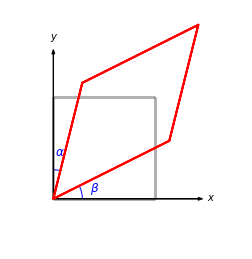

In [4]:
from matplotlib.patches import Arc

plt.figure()
plt.axis('image')
ax = plt.gca() 
ax.arrow(0,0,0,5,head_width=0.1, head_length=0.15, fc='k', ec='k',lw=1,alpha=1)
ax.arrow(0,0,5,0,head_width=0.1, head_length=0.15, fc='k', ec='k',lw=1,alpha=1)
ax.set_xlim(-1,6.5)
ax.set_ylim(-1,6.5)
txtfont = {'family': 'serif','color':  'k','weight': 'normal','size': 10}
plt.text(-0.1,5.5, '$y$', fontdict=txtfont)
plt.text(5.3,-0.05, '$x$', fontdict=txtfont)

ax.arrow(0,0,0,3.5,head_width=0.0, head_length=0.0, fc='r', ec='k',lw=3,alpha=0.3)
ax.arrow(0,0,3.5,0,head_width=0.0, head_length=0.0, fc='r', ec='k',lw=3,alpha=0.3)
ax.arrow(3.5,0,0,3.5,head_width=0.0, head_length=0.0, fc='r', ec='k',lw=3,alpha=0.3)
ax.arrow(0,3.5,3.5,0,head_width=0.0, head_length=0.0, fc='r', ec='k',lw=3,alpha=0.3)

ax.arrow(0,0,1,4,head_width=0.0, head_length=0.0, fc='r', ec='r',lw=2,alpha=1)
ax.arrow(0,0,4,2,head_width=0.0, head_length=0.0, fc='r', ec='r',lw=2,alpha=1)
ax.arrow(4,2,1,4,head_width=0.0, head_length=0.0, fc='r', ec='r',lw=2,alpha=1)
ax.arrow(1,4,4,2,head_width=0.0, head_length=0.0, fc='r', ec='r',lw=2,alpha=1)

txtfont = {'family': 'serif','color':  'b','weight': 'normal','size': 12}
ax.add_patch(Arc((0, 0), 2, 2, angle=0.0, theta1=0.0, theta2=25.0, edgecolor='b'))
ax.add_patch(Arc((0, 0), 2, 2, angle=75.0, theta1=0.0, theta2=15.0, edgecolor='b'))
plt.text(0.05,1.5, '$\\alpha$', fontdict=txtfont)
plt.text(1.25,0.25, '$\\beta$', fontdict=txtfont)

plt.axis('off')

In the case above the light grey square has been deformed into the red parallelogram by shear. In the engineering definition of shear strain ($\gamma_{xy}$) the imposed shear strain is the total change in angle $\gamma_{xy} = \alpha + \beta$

There is, however, a bit of a problem with this as you can see that the box has both sheared *and* rotated.  By the deinfition given above the following graph would be an equivalent description of the deformation of the body:

(-1.0, 6.5, -1.0, 6.5)

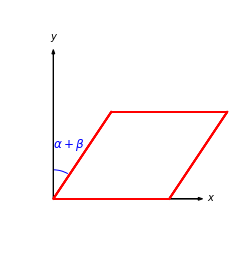

In [5]:
plt.figure()
plt.axis('image')
ax = plt.gca() 
ax.arrow(0,0,0,5,head_width=0.1, head_length=0.15, fc='k', ec='k',lw=1,alpha=1)
ax.arrow(0,0,5,0,head_width=0.1, head_length=0.15, fc='k', ec='k',lw=1,alpha=1)
ax.set_xlim(-1,6.5)
ax.set_ylim(-1,6.5)
txtfont = {'family': 'serif','color':  'k','weight': 'normal','size': 10}
plt.text(-0.1,5.5, '$y$', fontdict=txtfont)
plt.text(5.3,-0.05, '$x$', fontdict=txtfont)

ax.arrow(0,0,2,3,head_width=0.0, head_length=0.0, fc='r', ec='r',lw=2,alpha=1)
ax.arrow(0,0,4,0,head_width=0.0, head_length=0.0, fc='r', ec='r',lw=2,alpha=1)
ax.arrow(2,3,4,0,head_width=0.0, head_length=0.0, fc='r', ec='r',lw=2,alpha=1)
ax.arrow(4,0,2,3,head_width=0.0, head_length=0.0, fc='r', ec='r',lw=2,alpha=1)

txtfont = {'family': 'serif','color':  'b','weight': 'normal','size': 12}
ax.add_patch(Arc((0, 0), 2, 2, angle=60.0, theta1=0.0, theta2=30.0, edgecolor='b'))
plt.text(0.,1.75, '$\\alpha + \\beta$', fontdict=txtfont)

plt.axis('off')

In this sense, the actual shape change described by the engineering shear strain is not really unique - there are multiple ways of representing the shear strain just be changing how the angles $\alpha$ and $\beta$ are distributed.  This is because the engineering definition of shear strain is ambiguous about rotation.

The mathematical or 'tensoral' definition of shear strain removes this ambiguity by defining (in general) strains (in the limit of small strains) as:

$\epsilon_{ij} = \frac{1}{2}\left(\frac{\partial u_i}{\partial x_j} + \frac{\partial u_j}{\partial x_i}\right)$

Where $i$ and $j$ represent the directions (here $x$ and $y$) and $u_i$ represents the displacement of a point in the $i$ direction.  In the case of normal strains, there is no difference between the mathematical and engineering definitions.  However, in the case of shear strains there *is* an important difference. 

In the case of shear strain the mathematical definition of shear strain becomes:

$\epsilon_{xy} = \frac{1}{2}\left(\frac{\partial u_x}{\partial y} + \frac{\partial u_y}{\partial x}\right)$

Let's look at the case given above; what is $\partial u_x/\partial y$?  Let's approximate this as $\Delta u_x / \Delta y$  

(-1.0, 6.5, -1.0, 6.5)

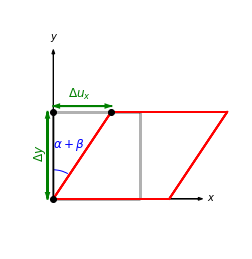

In [6]:
plt.figure()
plt.axis('image')
ax = plt.gca() 
ax.arrow(0,0,0,5,head_width=0.1, head_length=0.15, fc='k', ec='k',lw=1,alpha=1)
ax.arrow(0,0,5,0,head_width=0.1, head_length=0.15, fc='k', ec='k',lw=1,alpha=1)
ax.set_xlim(-1,6.5)
ax.set_ylim(-1,6.5)
txtfont = {'family': 'serif','color':  'k','weight': 'normal','size': 10}
plt.text(-0.1,5.5, '$y$', fontdict=txtfont)
plt.text(5.3,-0.05, '$x$', fontdict=txtfont)

ax.arrow(0,0,0,3,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=3,alpha=0.3)
ax.arrow(0,0,3,0,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=3,alpha=0.3)
ax.arrow(0,3,3,0,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=3,alpha=0.3)
ax.arrow(3,0,0,3,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=3,alpha=0.3)

ax.arrow(0,0,2,3,head_width=0.0, head_length=0.0, fc='r', ec='r',lw=2,alpha=1)
ax.arrow(0,0,4,0,head_width=0.0, head_length=0.0, fc='r', ec='r',lw=2,alpha=1)
ax.arrow(2,3,4,0,head_width=0.0, head_length=0.0, fc='r', ec='r',lw=2,alpha=1)
ax.arrow(4,0,2,3,head_width=0.0, head_length=0.0, fc='r', ec='r',lw=2,alpha=1)

ax.plot([0, 2,0], [3, 3,0], 'ko')
ax.arrow(-0.2,0,0,2.8,head_width=0.1, head_length=0.15, fc='g', ec='g',lw=2,alpha=1)
ax.arrow(-0.2,3,0,-2.8,head_width=0.1, head_length=0.15, fc='g', ec='g',lw=2,alpha=1)
ax.arrow(0,3.2,1.8,0,head_width=0.1, head_length=0.15, fc='g', ec='g',lw=2,alpha=1)
ax.arrow(2,3.2,-1.8,0,head_width=0.1, head_length=0.15, fc='g', ec='g',lw=2,alpha=1)



txtfont = {'family': 'serif','color':  'b','weight': 'normal','size': 12}
ax.add_patch(Arc((0, 0), 2, 2, angle=60.0, theta1=0.0, theta2=30.0, edgecolor='b'))
plt.text(0.,1.75, '$\\alpha + \\beta$', fontdict=txtfont)

txtfont = {'family': 'serif','color':  'g','weight': 'normal','size': 12}
plt.text(0.5,3.5, '$\Delta u_x$', fontdict=txtfont)
plt.text(-0.75,1.5, '$\Delta y$', fontdict=txtfont,rotation=90)

plt.axis('off')

So we see that in this case $\partial u_x/\partial y \approx \Delta u_x / \Delta y = \alpha + \beta$ is the engineering shear strain.  In comparison the mathematical definition of shear strain would be exactly half this value.  Physically, what does this mean? In the mathematical definition, the factor of 1/2 signifies that we are implicitly assuming that we are going to take the angles $\alpha$ and $\beta$ to be equal and equal to half the value of the engineering shear strain - i.e. $\epsilon_{xy} = \gamma_{xy}/2$.  Physically, then the same level of deformation as shown above would appear as below in the mathematical definition of shear strain.  Note that this is the same overall deformation but by explicitly assuming the same value for $\alpha$ and $\beta$ we remove any ambiguity about rotation, thereby removing rotation from our definition of strain!   

(-1.0, 6.5, -1.0, 6.5)

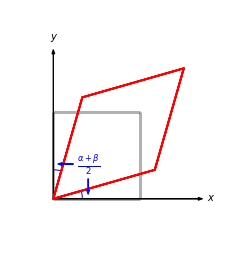

In [7]:
plt.figure()
plt.axis('image')
ax = plt.gca() 
ax.arrow(0,0,0,5,head_width=0.1, head_length=0.15, fc='k', ec='k',lw=1,alpha=1)
ax.arrow(0,0,5,0,head_width=0.1, head_length=0.15, fc='k', ec='k',lw=1,alpha=1)
ax.set_xlim(-1,6.5)
ax.set_ylim(-1,6.5)
txtfont = {'family': 'serif','color':  'k','weight': 'normal','size': 10}
plt.text(-0.1,5.5, '$y$', fontdict=txtfont)
plt.text(5.3,-0.05, '$x$', fontdict=txtfont)

ax.arrow(0,0,0,3,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=3,alpha=0.3)
ax.arrow(0,0,3,0,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=3,alpha=0.3)
ax.arrow(0,3,3,0,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=3,alpha=0.3)
ax.arrow(3,0,0,3,head_width=0.0, head_length=0.0, fc='k', ec='k',lw=3,alpha=0.3)

ax.arrow(0,0,1,3.5,head_width=0.0, head_length=0.0, fc='r', ec='r',lw=2,alpha=1)
ax.arrow(0,0,3.5,1,head_width=0.0, head_length=0.0, fc='r', ec='r',lw=2,alpha=1)
ax.arrow(1,3.5,3.5,1,head_width=0.0, head_length=0.0, fc='r', ec='r',lw=2,alpha=1)
ax.arrow(3.5,1,1,3.5,head_width=0.0, head_length=0.0, fc='r', ec='r',lw=2,alpha=1)


txtfont = {'family': 'serif','color':  'b','weight': 'normal','size': 12}
ax.add_patch(Arc((0, 0), 2, 2, angle=75.0, theta1=0.0, theta2=15.0, edgecolor='b'))
ax.add_patch(Arc((0, 0), 2, 2, angle=0.0, theta1=0.0, theta2=15.0, edgecolor='b'))
plt.text(0.8,1, '$\\frac{\\alpha + \\beta}{2}$', fontdict=txtfont)
ax.arrow(0.7,1.2,-0.4,0,head_width=0.1, head_length=0.15, fc='b', ec='b',lw=1,alpha=1)
ax.arrow(1.2,0.7,0,-0.4,head_width=0.1, head_length=0.15, fc='b', ec='b',lw=1,alpha=1)


plt.axis('off')

Now back to Mohr's circle for strain: when we use Mohr's circle we are really doing a set of mathematical operations and therefore (to be consistent) we need to use the mathematical definition of shear strain. So, when drawing Mohr's circle we should be drawing the vertical axis using $\epsilon_{xy} = \gamma_{xy}/2$ and when calculating we should use:

$\epsilon_{11} = \frac{\left(\epsilon_{xx} + \epsilon_{yy}\right)}{2} + \frac{\left(\epsilon_{xx} - \epsilon_{yy}\right)}{2}\cos{\left(2\theta\right)} + \epsilon_{xy}\sin{\left(2\theta\right)}$

$\epsilon_{22} = \frac{\left(\epsilon_{xx} + \epsilon_{yy}\right)}{2} - \frac{\left(\epsilon_{xx} - \epsilon_{yy}\right)}{2}\cos{\left(2\theta\right)} - \epsilon_{xy}\sin{\left(2\theta\right)}$

$\epsilon_{12} = \frac{\left(\epsilon_{xx} - \epsilon_{yy}\right)}{2}\sin{\left(2\theta\right)} + \epsilon_{xy}\cos{\left(2\theta\right)} $

Or, as it is often written, in terms of engineering shear strain:

$\epsilon_{11} = \frac{\left(\epsilon_{xx} + \epsilon_{yy}\right)}{2} + \frac{\left(\epsilon_{xx} - \epsilon_{yy}\right)}{2}\cos{\left(2\theta\right)} + \frac{\gamma_{xy}}{2}\sin{\left(2\theta\right)}$

$\epsilon_{22} = \frac{\left(\epsilon_{xx} + \epsilon_{yy}\right)}{2} - \frac{\left(\epsilon_{xx} - \epsilon_{yy}\right)}{2}\cos{\left(2\theta\right)} - \frac{\gamma_{xy}}{2}\sin{\left(2\theta\right)}$

$\frac{\gamma_{xy}}{2} = -\frac{\left(\epsilon_{xx} - \epsilon_{yy}\right)}{2}\sin{\left(2\theta\right)} - \frac{\gamma_{xy}}{2}\cos{\left(2\theta\right)} $

